实训一：分析学生考试成绩特征的分布与分散情况


1. 导入所需库并读取数据：


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel('student_grade.xlsx')

# 查看数据
display(data)

性别 文化成绩 完成情况  阅读成绩  写作成绩  总成绩
0  女    中  未完成    72    74  218
1  女    中   完成    69    90  247
2  女    高  未完成    72    73  188
3  女    高   完成    91    96  276
4  男    中  未完成    47    57  148
5  男    中   完成    76    78  229

2. 将学生考试总成绩分为4个区间，计算各区间下的学生人数，并绘制分布图：


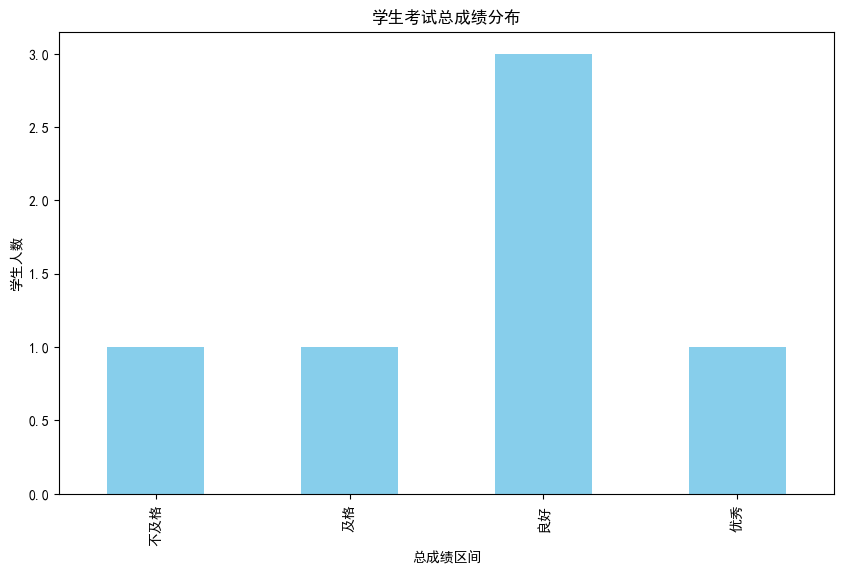

In [12]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# 定义总成绩区间
bins = [0, 150, 200, 250, 300]
labels = ['不及格', '及格', '良好', '优秀']

# 将总成绩分区间
data['总成绩区间'] = pd.cut(data['总成绩'], bins=bins, labels=labels)

# 计算各区间下的学生人数
score_distribution = data['总成绩区间'].value_counts().sort_index()

# 绘制分布图
plt.figure(figsize=(10, 6))
score_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('总成绩区间')
plt.ylabel('学生人数')
plt.title('学生考试总成绩分布')
plt.show()


3. 获取学生3项单科成绩的数据，绘制分数分散情况箱线图：


<Figure size 1000x600 with 0 Axes>

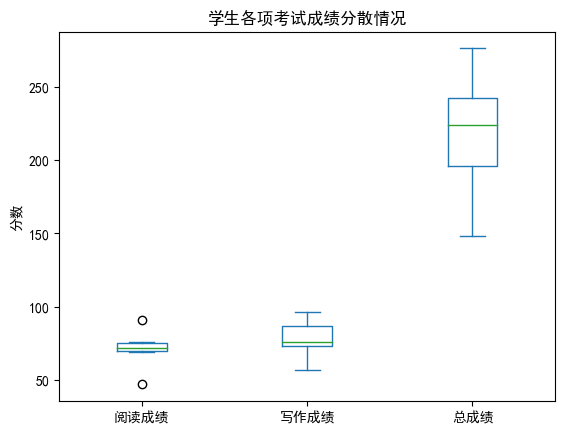

In [13]:
# 绘制单科成绩的箱线图
plt.figure(figsize=(10, 6))
data[['阅读成绩', '写作成绩', '总成绩']].plot(kind='box')
plt.ylabel('分数')
plt.title('学生各项考试成绩分散情况')
plt.show()

实训二：分析学生考试成绩与各个特征之间的关系


1. 导入所需库并读取数据：


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 重新读取数据
data = pd.read_excel('student_grade.xlsx')
display(data)

性别 文化成绩 完成情况  阅读成绩  写作成绩  总成绩
0  女    中  未完成    72    74  218
1  女    中   完成    69    90  247
2  女    高  未完成    72    73  188
3  女    高   完成    91    96  276
4  男    中  未完成    47    57  148
5  男    中   完成    76    78  229

2. 计算不同特征下学生总成绩的均值：


In [22]:
# 计算不同特征下的总成绩均值
mean_scores = data.groupby(['性别', '文化成绩', '完成情况'])['总成绩'].mean().unstack()

# 查看结果
display(mean_scores)


完成情况        完成    未完成
性别 文化成绩              
女  中     247.0  218.0
   高     276.0  188.0
男  中     229.0  148.0

3. 绘制对应内容的柱形图：


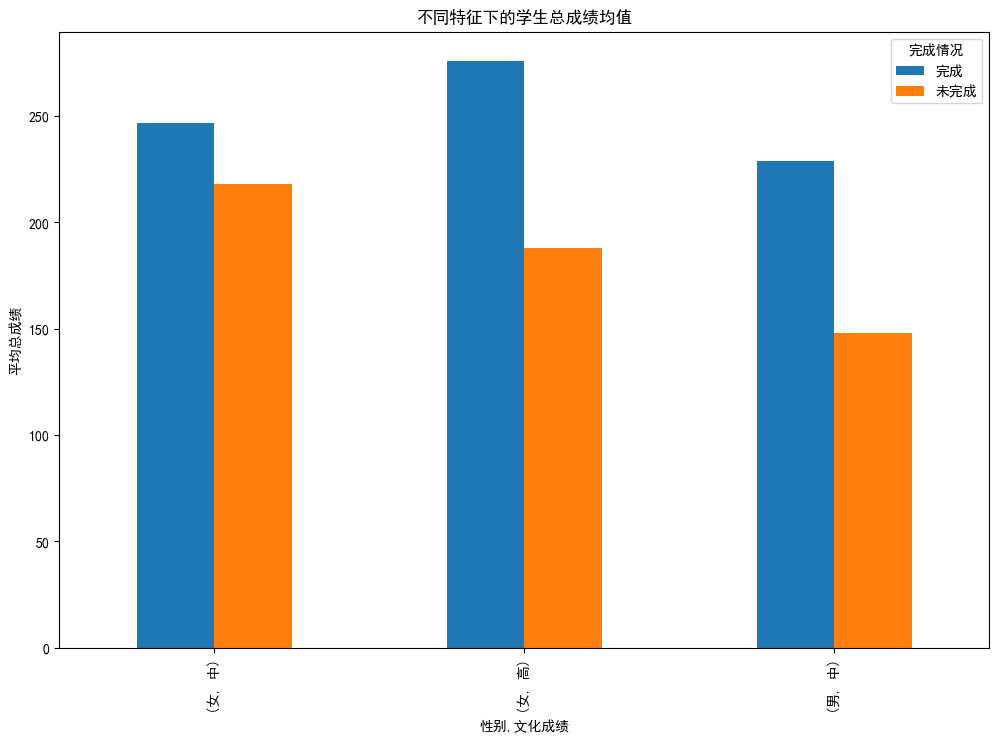

In [23]:
# 绘制柱形图
mean_scores.plot(kind='bar', figsize=(12, 8))
plt.ylabel('平均总成绩')
plt.title('不同特征下的学生总成绩均值')
plt.show()